In [26]:
import pandas as pd
df = pd.read_csv('./dataset.csv')
df

,Province,Year,Harvested Area,Production,Rainfall,Humidity,Temperature
0,Aceh,2018,329516,1861567,2336,81,28
1,Aceh,2019,310012,1714438,1437,82,27
2,Aceh,2020,317869,1757313,1790,76,29
3,Aceh,2021,297058,1634640,2293,76,29
4,Aceh,2022,271750,1509456,1834,76,29
...,...,...,...,...,...,...,...
199,Papua,2019,54132,235340,1823,77,28
200,Papua,2020,52728,166002,1502,75,28
201,Papua,2021,64985,286280,2028,76,28
202,Papua,2022,49742,193944,2576,84,28


In [27]:
from sklearn.preprocessing import LabelEncoder
le_province = LabelEncoder()
df['Province'] = le_province.fit_transform(df['Province'])
df

,Province,Year,Harvested Area,Production,Rainfall,Humidity,Temperature
0,0,2018,329516,1861567,2336,81,28
1,0,2019,310012,1714438,1437,82,27
2,0,2020,317869,1757313,1790,76,29
3,0,2021,297058,1634640,2293,76,29
4,0,2022,271750,1509456,1834,76,29
...,...,...,...,...,...,...,...
199,23,2019,54132,235340,1823,77,28
200,23,2020,52728,166002,1502,75,28
201,23,2021,64985,286280,2028,76,28
202,23,2022,49742,193944,2576,84,28


In [28]:
input_n = df.drop(['Production', 'Year'], axis='columns')
target = df['Production']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_n, target, test_size=0.2, random_state=42)

In [30]:
#scaling feature usign standardization
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))
print(X_train.shape)
#scale features
X_train_scaled = feature_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=["Province","Harvested Area","Rainfall","Humidity","Temperature"], index=X_train.index)

# Scale target variable
# Reshape is needed because StandardScaler expects 2D array
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
print(X_train_scaled)
print(y_train_scaled)

(163, 5)
     Province  Harvested Area  Rainfall  Humidity  Temperature
199  0.696970        0.029636  0.276728  0.363636          0.6
93   0.060606        0.174608  0.516504  0.272727          0.8
38   0.090909        0.035128  0.785344  0.363636          0.8
24   0.212121        0.047240  0.446959  0.727273          0.4
96   0.030303        0.060839  0.222960  0.500000          0.6
..        ...             ...       ...       ...          ...
106  0.636364        0.148176  0.448412  0.409091          0.8
14   0.939394        0.162212  0.880424  1.000000          0.6
92   0.060606        0.178497  0.458377  0.227273          1.0
179  0.787879        0.032372  0.428690  0.500000          0.6
102  0.636364        0.158688  0.244551  0.227273          0.8

[163 rows x 5 columns]
[2.23748270e-02 1.52662045e-01 2.78508815e-02 3.64431838e-02
 6.34951446e-02 6.96679212e-02 2.61100764e-02 2.19494598e-02
 4.26319617e-04 2.85469368e-02 2.31739381e-02 1.60713733e-01
 1.32682075e-01 4.94595523e-

In [31]:
# Step 6: Transform the test data using the same scalers
# CRUCIAL: Use transform (not fit_transform) on test data
X_test_scaled = feature_scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=["Province","Harvested Area","Rainfall","Humidity","Temperature"], index=X_test.index)
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

In [32]:
from xgboost import XGBRegressor
# GPU-accelerated XGBoost model
model = XGBRegressor(
    colsample_bytree=0.8, 
    learning_rate=0.15, 
    max_depth=4, 
    n_estimators= 750,
    reg_alpha=0.5, 
    reg_lambda= 0.5,
    subsample=0.9,
    tree_method='gpu_hist',    # Use GPU-accelerated histogram algorithm
    device='cuda'              # Specify CUDA device
)
model.fit(X_train_scaled, y_train_scaled)

/home/ashwin/Desktop/Internship/code/Indonesia-rice-prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:40:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [33]:
model.score(X_test_scaled, y_test_scaled) # This is the R² error

/home/ashwin/Desktop/Internship/code/Indonesia-rice-prediction/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [16:40:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


0.7877267471132311

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_scaled = model.predict(X_test_scaled)

# Regression metrics
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)

print(f"Mean Squared Error: {mse:.6f}")
print(f"Mean Absolute Error: {mae:.6f}")
print(f"R² Score: {r2:.6f}")


Mean Squared Error: 0.022911
Mean Absolute Error: 0.072005
R² Score: 0.787727


# Time Series Forecasting

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [36]:
df = pd.read_csv("dataset.csv", index_col=[1], parse_dates=[1])
df

,Province,Harvested Area,Production,Rainfall,Humidity,Temperature
Year,,,,,,
2018-01-01,Aceh,329516,1861567,2336,81,28
2019-01-01,Aceh,310012,1714438,1437,82,27
2020-01-01,Aceh,317869,1757313,1790,76,29
2021-01-01,Aceh,297058,1634640,2293,76,29
2022-01-01,Aceh,271750,1509456,1834,76,29
...,...,...,...,...,...,...
2019-01-01,Papua,54132,235340,1823,77,28
2020-01-01,Papua,52728,166002,1502,75,28
2021-01-01,Papua,64985,286280,2028,76,28


In [37]:
provinces = df['Province'].unique()
provinces.shape

(34,)

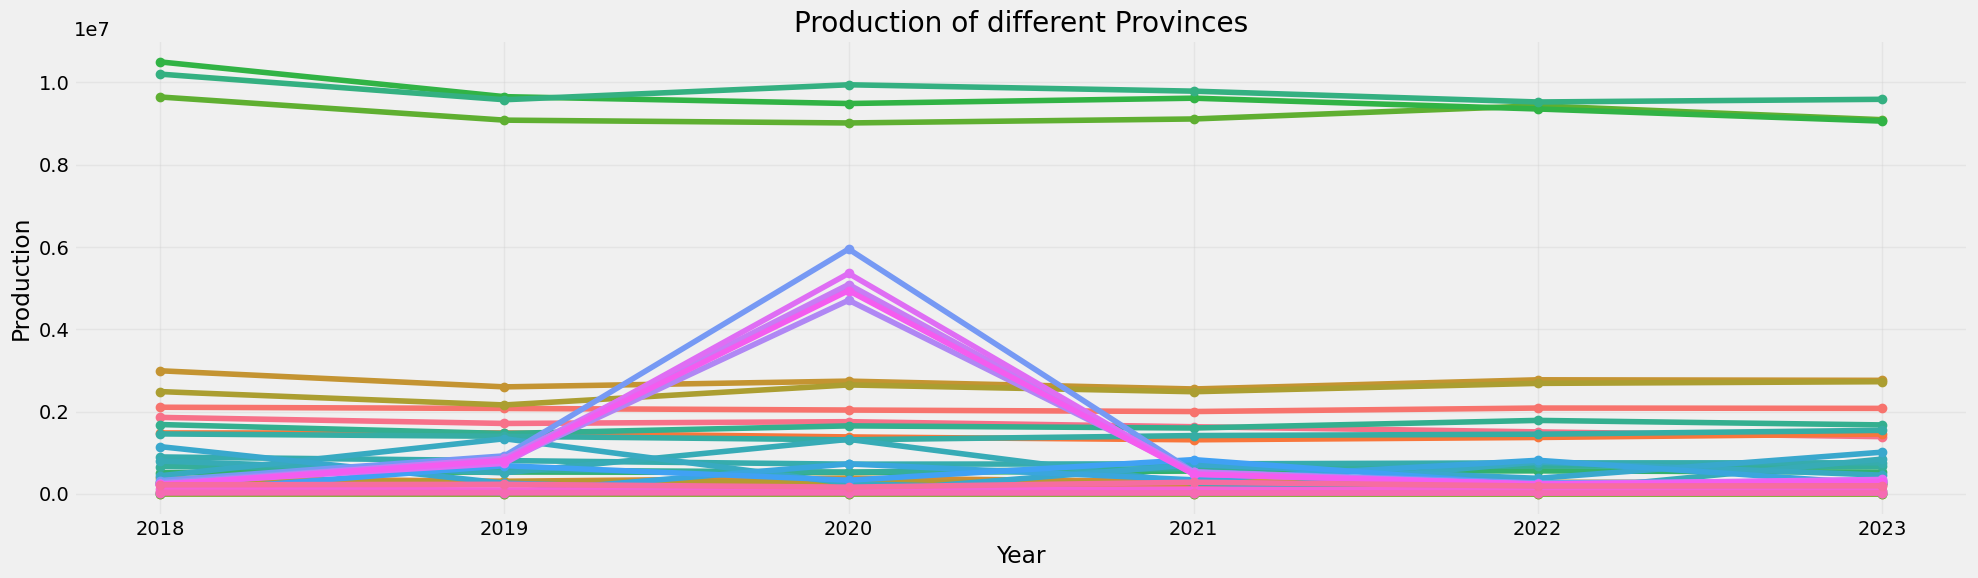

In [38]:
# Plot production for each province with unique colors
plt.figure(figsize=(20, 6))

# Use seaborn color palette for unique colors
colors = sns.color_palette("husl", len(provinces))

for i, province in enumerate(provinces):
    item = df[df['Province'] == province]
    plt.plot(item.index, item['Production'], label=province, marker='o', color=colors[i])

plt.title('Production of different Provinces')
plt.xlabel('Year')
plt.ylabel('Production')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside plot
plt.grid(True, alpha=0.3)
plt.tight_layout()  # Adjust layout to fit legend
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Province'] = encoder.fit_transform(df['Province'])
df

,Province,Harvested Area,Production,Rainfall,Humidity,Temperature
Year,,,,,,
2018-01-01,0,329516,1861567,2336,81,28
2019-01-01,0,310012,1714438,1437,82,27
2020-01-01,0,317869,1757313,1790,76,29
2021-01-01,0,297058,1634640,2293,76,29
2022-01-01,0,271750,1509456,1834,76,29
...,...,...,...,...,...,...
2019-01-01,23,54132,235340,1823,77,28
2020-01-01,23,52728,166002,1502,75,28
2021-01-01,23,64985,286280,2028,76,28


In [40]:
split_date = '2021-01-01'	
rice_train = df.loc[df.index <= split_date]
rice_test = df.loc[df.index > split_date]
def create_X_and_Y(t_df):
    X = pd.DataFrame(t_df.drop('Production', axis=1))
    y = pd.DataFrame(t_df['Production'])
    return X, y

X_train, y_train = create_X_and_Y(rice_train) 
X_test, y_test = create_X_and_Y(rice_test)

In [41]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

X_train_s = feature_scaler.fit_transform(X_train)
X_train_s = pd.DataFrame(X_train_s, columns=["Province","Harvested Area","Rainfall","Humidity","Temperature"], index=X_train.index)
y_train_s = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
print(X_train_s)
print(y_train_s)

            Province  Harvested Area  Rainfall  Humidity  Temperature
Year                                                                 
2018-01-01  0.000000        0.180734  0.381247  0.583333          0.6
2019-01-01  0.000000        0.170028  0.195580  0.625000          0.4
2020-01-01  0.000000        0.174341  0.268484  0.375000          0.8
2021-01-01  0.000000        0.162917  0.372367  0.375000          0.8
2018-01-01  1.000000        0.223913  0.391987  0.500000          0.8
...              ...             ...       ...       ...          ...
2021-01-01  0.727273        0.003373  0.686080  0.791667          0.4
2018-01-01  0.696970        0.028623  0.516522  0.666667          0.6
2019-01-01  0.696970        0.029567  0.275299  0.416667          0.6
2020-01-01  0.696970        0.028796  0.209005  0.333333          0.6
2021-01-01  0.696970        0.035524  0.317637  0.375000          0.6

[136 rows x 5 columns]
[1.77232209e-01 1.63218235e-01 1.67302061e-01 1.55617510e-01
 2.00

In [42]:
X_test_scaled = feature_scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=["Province","Harvested Area","Rainfall","Humidity","Temperature"], index=X_test.index)
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).flatten()
print(X_test_scaled)
print(y_test_scaled)


            Province  Harvested Area  Rainfall  Humidity  Temperature
Year                                                                 
2022-01-01  0.000000        0.149025  0.277571  0.375000          0.8
2023-01-01  0.000000        0.139456  0.426477  0.541667          0.6
2022-01-01  1.000000        0.225717  0.574143  0.458333          0.8
2023-01-01  1.000000        0.221881  0.426477  0.541667          0.6
2022-01-01  0.939394        0.149098  0.921314  0.583333          0.4
...              ...             ...       ...       ...          ...
2023-01-01  0.606061        0.004070  0.426477  0.541667          0.6
2022-01-01  0.727273        0.002850  0.218711  0.708333          0.6
2023-01-01  0.727273        0.002888  0.426477  0.541667          0.6
2022-01-01  0.696970        0.027157  0.430814  0.708333          0.6
2023-01-01  0.696970        0.026927  0.426477  0.541667          0.6

[68 rows x 5 columns]
[ 1.43693788e-01  1.32646552e-01  1.98855481e-01  1.98101009e-01
  

In [43]:
model = xgb.XGBRegressor( 
    n_estimators=1000,          # More estimators for complex time series patterns
    learning_rate=0.1,          # Learning rate
    max_depth=6,                # Tree depth
    subsample=0.8,              # Subsample ratio
    colsample_bytree=0.8,       # Feature subsampling
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=1.0,             # L2 regularization
    random_state=42,
    early_stopping_rounds=50,   # Early stopping to prevent overfitting
    eval_metric='rmse'  
    )
model.fit(X_train_s, y_train_s, eval_set=[(X_train_s, y_train_s), (X_test_scaled, y_test_scaled)])

[0]	validation_0-rmse:0.23766	validation_1-rmse:0.22395
[1]	validation_0-rmse:0.21819	validation_1-rmse:0.20391
[2]	validation_0-rmse:0.20453	validation_1-rmse:0.19701
[3]	validation_0-rmse:0.18812	validation_1-rmse:0.18026
[4]	validation_0-rmse:0.17839	validation_1-rmse:0.17491
[5]	validation_0-rmse:0.16451	validation_1-rmse:0.16092
[6]	validation_0-rmse:0.15217	validation_1-rmse:0.14952
[7]	validation_0-rmse:0.14155	validation_1-rmse:0.13819
[8]	validation_0-rmse:0.13199	validation_1-rmse:0.12881
[9]	validation_0-rmse:0.12278	validation_1-rmse:0.12022
[10]	validation_0-rmse:0.11489	validation_1-rmse:0.11215
[11]	validation_0-rmse:0.10754	validation_1-rmse:0.10575
[12]	validation_0-rmse:0.10128	validation_1-rmse:0.09908
[13]	validation_0-rmse:0.09613	validation_1-rmse:0.09354
[14]	validation_0-rmse:0.09095	validation_1-rmse:0.08876
[15]	validation_0-rmse:0.08647	validation_1-rmse:0.08439
[16]	validation_0-rmse:0.08203	validation_1-rmse:0.08034
[17]	validation_0-rmse:0.07838	validation

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,'rmse'


In [44]:
prediction = model.predict(X_test_scaled)
model.score(X_test_scaled, y_test_scaled)

0.9484753908422743

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on test data

# Calculate metrics on scaled data
mse_scaled = mean_squared_error(y_test_scaled, prediction)
mae_scaled = mean_absolute_error(y_test_scaled, prediction)
r2_scaled = r2_score(y_test_scaled, prediction)


print("=== Time Series XGboost Results ===")
print("\nScaled Data Metrics:")
print(f"Mean Squared Error: {mse_scaled:.6f}")
print(f"Mean Absolute Error: {mae_scaled:.6f}")
print(f"R² Score: {r2_scaled:.6f}")

=== Time Series XGboost Results ===

Scaled Data Metrics:
Mean Squared Error: 0.003082
Mean Absolute Error: 0.035826
R² Score: 0.948475


# Hyper parameter Tuning


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 700, 750],           # Number of boosting rounds
    'learning_rate': [0.05, 0.1, 0.15, 0.01],       # Step size shrinkage
    'max_depth': [4, 6, 8, 1],                   # Maximum tree depth
    'subsample': [0.8, 0.9, 1.0],            # Fraction of samples used per tree
    'colsample_bytree': [0.8, 0.9, 1.0, 0.5],     # Fraction of features used per tree  
    'reg_alpha': [0, 0.1, 0.5],              # L1 regularization (Lasso)
    'reg_lambda': [1, 1.5, 2, 0.5]                # L2 regularization (Ridge)
}

#To Enable GPU acceleration by setting tree_method='gpu_hist' and device='cuda'
gb_grid = XGBRegressor(
    random_state=42,
)

grid_search = GridSearchCV(
    gb_grid, 
    param_grid, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1,        # Set to 1 to use GPU 
    verbose=1
)
grid_search.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 9216 candidates, totalling 46080 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 0.9, ...], 'learning_rate': [0.05, 0.1, ...], 'max_depth': [4, 6, ...], 'n_estimators': [100, 300, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [50]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
best_r2 = r2_score(y_test_scaled, y_pred_best)
best_mse = mean_squared_error(y_test_scaled, y_pred_best)
best_mae = mean_absolute_error(y_test_scaled, y_pred_best)

print(f"\nBest Model Test Set Performance:")
print(f"MSE: {best_mse:,.6f}")
print(f"MAE: {best_mae:,.6f}")
print(f"R² Score: {best_r2:.6f}")

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 750, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.8}
Best cross-validation score: 0.4069

Best Model Test Set Performance:
MSE: 0.002652
MAE: 0.036588
R² Score: 0.955669


# SHAP analysis


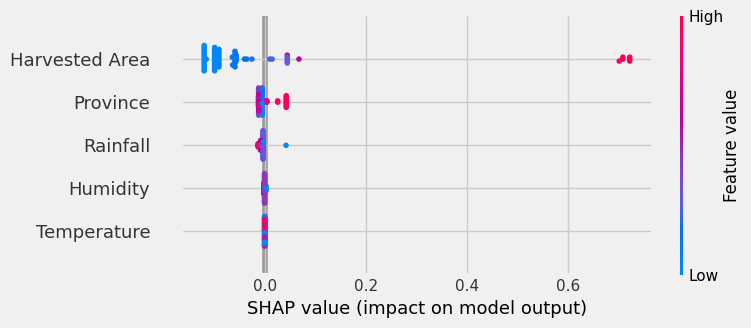

In [51]:
#shap analysis
import shap
shap.initjs()
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled)